In [0]:
import random
import math
import matplotlib.pyplot as plt

In [0]:
def generador_aleatorio():
    """
    Genera una variable aleatoria
    con una distribución uniforme.

    Randum
    
    xo = 123456789
    a = 65539
    c = 0
    m = 2**31
    xi = (a * xo + c) % m
    xo = xi
    U = xi / m
    """
    return random.random()

def exponencial(valor_lambda):

    n_aleatorio = generador_aleatorio()
    value = - (math.log(1 - n_aleatorio) / float(valor_lambda))
    return value

def normal():

    n_aleatorio = generador_aleatorio()
    raiz_cuadrada = math.sqrt(-2 * math.log1p(n_aleatorio - 1))
    sen = math.sin(2 * math.pi * n_aleatorio)
    value = raiz_cuadrada * sen
    if(value < 0):
        value = 0
    return value

In [0]:
def llega_cliente(tiempo_actual):
    """
    """
    global prom_clientes
    global n_clientes
    global n_llegadas
    global llegadas
    global tiempo
    global valor_lambda
    global tiempo_max_servicio
    global prom_tiempos
    global clientes, tiempos_nodos
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    prom_clientes['nodo 1'] += n_clientes['nodo 1'] * (tiempo_actual - tiempo)
    n_clientes['nodo 1'] += 1
    n_llegadas['nodo 1'] += 1
    llegadas['nodo 1'].append(tiempo_actual)
    
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    tiempo = tiempo_actual
    tiempo_nueva_simulacion = exponencial(valor_lambda)
    
    if(tiempo + tiempo_nueva_simulacion < tiempo_max_servicio):
        prom_tiempos['tiempos salida'] = tiempo + tiempo_nueva_simulacion
    if(n_clientes['nodo 1'] == 1):
        tiempo_servicio = normal()
        prom_tiempos['servicio nodo 1'] = tiempo + tiempo_servicio
        
        
def servidor_nodo_1(tiempo_actual):
    """
    Atiende al cliente que esté en el nodo 1
    y lo envia para el nodo 2 o 3 según
    la probabilidad asociada a estos.
    """
    global prom_clientes
    global n_clientes
    global tiempo
    global n_salidas
    global salidas
    global n_llegadas
    global llegadas
    global prom_tiempos
    global clientes, tiempos_nodos
    
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    prom_clientes['nodo 1'] += n_clientes['nodo 1'] * (tiempo_actual - tiempo)
    n_clientes['nodo 1'] -= 1
    n_salidas['nodo 1'] += 1
    salidas['nodo 1'].append(tiempo_actual)
    
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    random_number = generador_aleatorio()
    if(random_number < 0.4):
        prom_clientes['nodo 2'] += n_clientes['nodo 2'] * (tiempo_actual - tiempo)
        n_clientes['nodo 2'] += 1
        n_llegadas['nodo 2'] += 1
        llegadas['nodo 2'].append(tiempo_actual)
        if(n_clientes['nodo 2'] == 1):
            tiempo_nueva_simulacion = exponencial(valor_lambda)
            prom_tiempos['servicio nodo 2'] = tiempo_actual + tiempo_nueva_simulacion
    else:
        prom_clientes['nodo 3'] += n_clientes['nodo 3'] * (tiempo_actual - tiempo)
        n_clientes['nodo 3'] += 1
        n_llegadas['nodo 3'] += 1
        llegadas['nodo 3'].append(tiempo_actual)
        if(n_clientes['nodo 3'] == 1):
            tiempo_servicio = normal()
            prom_tiempos['servicio nodo 3'] = tiempo_actual + tiempo_servicio
    
    tiempo = tiempo_actual
    if(n_clientes['nodo 1'] > 0):
        tiempo_servicio = normal()
        prom_tiempos['servicio nodo 1'] = tiempo + tiempo_servicio
        
        
def servidor_nodo_2(tiempo_actual):
    """
    Atiende al cliente que está en el
    nodo 2 y lo envía para el nodo 3.
    """
    global prom_clientes
    global n_clientes
    global tiempo
    global n_salidas
    global salidas
    global n_llegadas
    global llegadas
    global prom_tiempos
    global clientes, tiempos_nodos
    
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    prom_clientes['nodo 2'] += n_clientes['nodo 2'] * (tiempo_actual - tiempo)
    n_clientes['nodo 2'] -= 1
    n_salidas['nodo 2'] += 1
    salidas['nodo 2'].append(tiempo_actual)
    
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    if(n_clientes['nodo 2'] > 0):
        tiempo_nueva_simulacion = exponencial(valor_lambda)
        prom_tiempos['servicio nodo 2'] = tiempo_actual + tiempo_nueva_simulacion
        
    prom_clientes['nodo 3'] += n_clientes['nodo 3'] * (tiempo_actual - tiempo)
    n_clientes['nodo 3'] += 1
    n_llegadas['nodo 3'] += 1
    llegadas['nodo 3'].append(tiempo_actual)
    if(n_clientes['nodo 3'] == 1):
        tiempo_servicio = normal()
        prom_tiempos['servicio nodo 3'] = tiempo_actual + tiempo_servicio
        

def servidor_nodo_3(tiempo_actual):
    """
    Atiende al cliente que está en el
    nodo 3 y termina el proceso.
    """
    global prom_clientes
    global n_clientes
    global tiempo
    global n_salidas
    global salidas
    global n_llegadas
    global llegadas
    global prom_tiempos
    global clientes, tiempos_nodos
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    prom_clientes['nodo 3'] += n_clientes['nodo 3'] * (tiempo_actual - tiempo)
    n_clientes['nodo 3'] -= 1
    n_salidas['nodo 3'] += 1
    salidas['nodo 3'].append(tiempo_actual)
    
    
    clientes['nodo 1'].append(n_clientes['nodo 1'])
    tiempos_nodos['nodo 1'].append(tiempo)
    clientes['nodo 2'].append(n_clientes['nodo 2'])
    tiempos_nodos['nodo 2'].append(tiempo)
    clientes['nodo 3'].append(n_clientes['nodo 3'])
    tiempos_nodos['nodo 3'].append(tiempo)
    
    
    if(n_clientes['nodo 3'] > 0):
        if(n_clientes['nodo 3'] < 5):
            tiempo_servicio = normal()
        else:
            tiempo_servicio = normal()
        
        prom_tiempos['servicio nodo 3'] = tiempo_actual + tiempo_nueva_simulacion
        
    tiempo = tiempo_actual

In [0]:
n_simulaciones = 10
tiempos_simulacion = []
tiempos_despues_cerrar = []
tiempo_prom_sist = []

for i in range(n_simulaciones):
    M = 9999999999 
    tiempo = 0
    tiempo_desp_ult_cliente = 0
    tiempo_actual = 0
    tiempo_max_servicio = 10
    
    clientes = { # Eje Y
        'nodo 1': [0],
        'nodo 2': [0],
        'nodo 3': [0]
    }
    tiempos_nodos = { # Eje X
        'nodo 1': [0],
        'nodo 2': [0],
        'nodo 3': [0]
    }

    prom_tiempos = {
        'tiempos salida': M,
        'servicio nodo 1': M,
        'servicio nodo 2': M,
        'servicio nodo 3': M
    }

    n_llegadas = {
        'nodo 1': 0,
        'nodo 2': 0,
        'nodo 3': 0
    }
    n_salidas = {
        'nodo 1': 0,
        'nodo 2': 0,
        'nodo 3': 0
    }
    n_clientes = {
        'nodo 1': 0,
        'nodo 2': 0,
        'nodo 3': 0
    }

    llegadas = {
        'nodo 1': [],
        'nodo 2': [],
        'nodo 3': []
    }
    salidas = {
        'nodo 1': [],
        'nodo 2': [],
        'nodo 3': []
    }

    prom_clientes = {
        'nodo 1': 0,
        'nodo 2': 0,
        'nodo 3': 0
    }

    tiempo_prom_sistema = 0
    valor_lambda = 1


    tiempo_actual = exponencial(valor_lambda)

    if(tiempo_actual > tiempo_max_servicio):
        tiempo_desp_ult_cliente = 0
        tiempo_prom_sistema = 0
        prom_clientes['nodo 1'] = 0
        prom_clientes['nodo 2'] = 0
        prom_clientes['nodo 3'] = 0
    else:
        llega_cliente(tiempo_actual)
        contador = 0
        while(prom_tiempos['tiempos salida'] != M
              or prom_tiempos['servicio nodo 1'] != M
              or prom_tiempos['servicio nodo 2'] != M
              or prom_tiempos['servicio nodo 3'] != M):
                
            if(min(prom_tiempos, key=lambda x: prom_tiempos[x]) == 'tiempos salida'):
                tiempo_nueva_simulacion = prom_tiempos['tiempos salida']
                prom_tiempos['tiempos salida'] = M
                llega_cliente(tiempo_nueva_simulacion)
            if(min(prom_tiempos, key=lambda x: prom_tiempos[x]) == 'servicio nodo 1'):
                tiempo_nueva_simulacion = prom_tiempos['servicio nodo 1']
                prom_tiempos['servicio nodo 1'] = M
                servidor_nodo_1(tiempo_nueva_simulacion)
            if(min(prom_tiempos, key=lambda x: prom_tiempos[x]) == 'servicio nodo 2'):
                tiempo_nueva_simulacion = prom_tiempos['servicio nodo 2']
                prom_tiempos['servicio nodo 2'] = M
                servidor_nodo_2(tiempo_nueva_simulacion)
            if(min(prom_tiempos, key=lambda x: prom_tiempos[x]) == 'servicio nodo 3'):
                tiempo_nueva_simulacion = prom_tiempos['servicio nodo 3']
                prom_tiempos['servicio nodo 3'] = M
                servidor_nodo_3(tiempo_nueva_simulacion)

        tiempo_desp_ult_cliente = max(0, tiempo - tiempo_max_servicio)
        acumulado_1 = 0
        acumulado_2 = 0
        acumulado_3 = 0

        contador = 0
        while(contador < n_llegadas['nodo 1']):
            acumulado_1 += salidas['nodo 1'][contador] - llegadas['nodo 1'][contador]
            contador += 1

        contador = 0
        while(contador < n_llegadas['nodo 2']):
            acumulado_2 += salidas['nodo 2'][contador] - llegadas['nodo 2'][contador]
            contador += 1

        contador = 0
        while(contador < n_llegadas['nodo 3']):
            acumulado_3 += salidas['nodo 3'][contador] - llegadas['nodo 3'][contador]
            contador += 1

        try:
            tiempo_prom_sistema = ((acumulado_1  / n_llegadas['nodo 1'])
                    + (0.4 * acumulado_2  / n_llegadas['nodo 2']) 
                    + (acumulado_3  / n_llegadas['nodo 3']))
        except Exception:
            pass
        

        prom_clientes['nodo 1'] /= tiempo
        prom_clientes['nodo 2'] /= tiempo
        prom_clientes['nodo 3'] /= tiempo
        
        tiempo_prom_sist.append(tiempo_prom_sistema)
        tiempos_simulacion.append(tiempo)
        tiempos_despues_cerrar.append(tiempo_desp_ult_cliente)

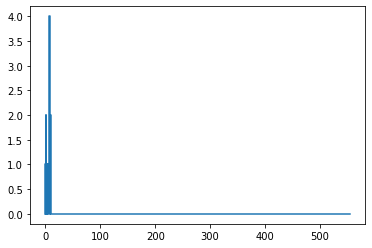

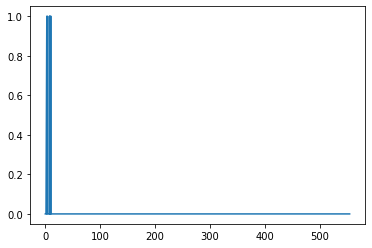

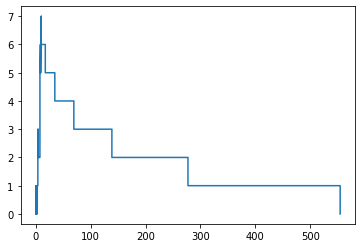

Simulaciones realizadas: 10
Tiempo de simulación promedio: 1517.9447030110155
Tiempo de servicio promedio después del cierre: 1507.9447030110155
Tiempo medio promedio del sistema: 247.8136582106537


In [5]:
plt.plot(tiempos_nodos['nodo 1'], clientes['nodo 1'])
plt.show()
plt.plot(tiempos_nodos['nodo 2'], clientes['nodo 2'])
plt.show()
plt.plot(tiempos_nodos['nodo 3'], clientes['nodo 3'])
plt.show()

print("Simulaciones realizadas: {}".format(len(tiempos_simulacion)))
print("Tiempo de simulación promedio: {}".format(sum(tiempos_simulacion) / len(tiempos_simulacion)))
print("Tiempo de servicio promedio después del cierre: {}".format(sum(tiempos_despues_cerrar) / len(tiempos_despues_cerrar)))
print("Tiempo medio promedio del sistema: {}".format(sum(tiempo_prom_sist) / len(tiempo_prom_sist)))